使用第一种频率抽样法设计一个线性相位低通滤波器，要求通带截止频率$\omega_p=0.2\pi$，阻带截止频率$\omega_s=0.3\pi$，阻带最小衰减$A_s=40dB$。

In [6]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal, fftpack
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [7]:
#输入采样后的|Hk|序列
N = 40 #采样点数
Hrs1 = np.ones(5);Hrs2 = np.zeros(29);Hrs3 = np.ones(4)
T = np.array([0.39]) #在过渡带设置H（k）=0.39
Hrs = np.concatenate((Hrs1,T,Hrs2,T,Hrs3))

In [8]:
#计算Hk的相位，得出Hk的表达式
alpha = (N-1)/2;d = np.floor(alpha)+1
k1 = np.arange(d);k2 = np.arange(d,N)
angH1 = -alpha*(2*pi)*k1/N;angH2 = alpha*(2*pi)*(N-k2)/N
angH = np.concatenate((angH1,angH2))
HK = Hrs*np.exp(1j*angH) #Hk的表达式

In [9]:
#计算滤波器的频率响应
hn = np.real(fftpack.ifft(HK));w,He = signal.freqz(hn,1)

用频率抽样法设计的FIR滤波器幅度响应如下图：

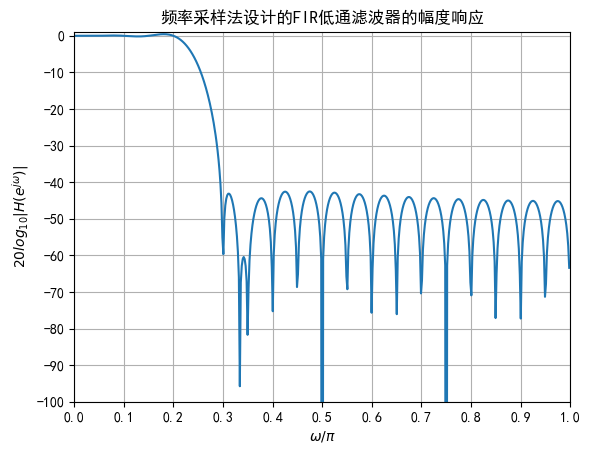

In [10]:
#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(w/pi,20*np.log10(abs(He)))
ax.set_title('频率采样法设计的FIR低通滤波器的幅度响应');ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_freq_samp1.png',dpi=500)

根据上图可以看出，在通带和阻带交界处插入一个0.39的采样值，有效地改善了频率特性，使阻带最小衰减达到$-40dB$以上，此时各项指标均得到满足，FIR滤波器设计完成。